## Introduction/Business Problem

Background:
Shyamal is the director of a leading travel and tourism company in India. The company serves foreign tourists only and provide services for arranging stays, local sightseeing and private cabs. His company also prints travel guides for all cities in India for its customers. As of now all travel guides are printed in English Language. Shyamal wants to experiment and provide localized versions to its customers. He wants Yoda to find out which other **two languages should be chosen for the travel guide. 

Additionally, he wants to finalize **five states for the beta launch of new sections** in travel guide. Shyamal also wants Yoda to highlight the **best most populous city to visit** (This is where we will have the Battle of Neighborhoods!) from the five selected selected states, as he plans to add content related to the same.

Of the five cities selected, Shyamal also wants to **highlight which cities are most similar based on type of places to visit in those cities**.

Target Audience: Tourists visiting India

Why it is important to solve: Many tourists who do not understand English will benefit from localized version of the travel guide. Additionally, for state governments of the states selected in top 5, it will be a good excercise to review how they fare. They can run similar data science experiments at a larger scale to improve overall rating for tourists.

As part of this capstone project Yoda will work on Shyamal's business problem and share his recommendations backed by data analysis.

## Data

In order to find languages we choose for translation, we need to find tourists visiting India belong to which nation mainly. And what is the most prominent spoken language in that country. 

#### Data1 
Yoda plans to use Indian Government data on foreign tourists to identify top nationalities. 

    [Foreign Tourist Arrivals In India from 2001 to 2015](https://data.gov.in/resources/foreign-tourist-arrivals-india-top-15-source-countries-2001-2015)

    The above link provides data in various formats. Yoda plans to use CSV version. It contains yearly cumulative record of vistors from different countries sorted already
    
#### Data2
Yoda will be using [wikipedia](https://en.wikipedia.org/wiki/List_of_official_languages_by_country_and_territory) to identify the official language for top 2 nations.

    This page lists official languages for most nations. Yoda will leverage result of Data1 Analysis, to find **two languages** to be used for travel guides.

#### Data3
For finding the **states for beta launch**, Yoda needs to identify which states were visted the most by foreign tourists. 

Yoda will leverage [State/ UT wise] (https://data.gov.in/resources/stateut-wise-details-foreign-tourist-visits-2014-2016-ministry-tourism) data for this. 

The above link provides data in various formats. Yoda plans to use CSV version. 

Since each state has many cities, we will pick up top city by population(if available)  for the purpose of this assignment. We will obtain this data from [Wikipedia](https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population)

**Best populous city** to visit will be from the list.

#### Data4
For [best most populous to visit](https://developer.foursquare.com/docs/api/venues/explore), Yoda will use the foursquare APIs to find data for the cities identified in  *Data 3* section. This data will be used to rank cities based on most venues and most variety in venues (categories)

Additionally data for cleanliness(Swatchhta) and price index will be used for ranking calculation. 

#### Data5
Cleanliness data will be obtained from 2017 ranking [here](http://indpaedia.com/ind/index.php/Cleanliness_ranks_of_Indian_cities,_districts:_2017#Ranks_1-434:_The_complete_list). Since it ranks cities, Yoda will use this data directly and normalize it for ranking calculation.

Price index data will be obtained from this [link](https://www.expatistan.com/cost-of-living/country/india). More the price index lower the rank. 

So, ranking R will be a function of data points obtained from foursquare API V (number of venues), C (number of categories), S (rank from Swatchhta Abhiyan), P (Price Index)

**R = f(V,C,S,P)

Yoda will use mean of ranks in each category to find the **best most populous city for visit

Obviosuly one can add more parameters but for the purpose of this assignment Yoda will limit to these.


#### Similar Cities
Yoda will cluster five cities identified into two groups based on venue data obtained above. Cities falling in the same group will be considered similar


## Data Analysis & Results

Let's review the first dataset

In [44]:
import pandas as pd

df = pd.read_csv('country-wise.csv')

In [45]:
df.shape

(19, 16)

We can drop data for Others in the last row as we are interested in specific countries only

In [46]:
df=df.drop(df.index[18])

In [47]:
df['mean']=df.mean(axis=1)

In [48]:
df.sort_values('mean', ascending=False).head()

,Name of Countries,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
0,USA,329147,348182,410803,526120,611165,696739,799062,804933,827140,931292,980688,1039947,1085309,1118983,1213624,781542.266667
1,UK,405472,387846,430917,555907,651803,734240,796191,776530,769251,759494,798249,788170,809444,942562,867601,698245.133333
2,BANGLADESH,431312,435867,454611,477446,456371,484401,480240,541884,468899,431962,463543,487397,524923,838860,1133879,540773.000000
3,SRILANKA,112813,108008,109098,128711,136400,154813,204084,218805,239995,266515,305853,296983,262345,301601,299513,209702.466667
4,CANADA,88600,93598,107671,135884,157643,176567,208214,222364,224069,242372,259017,256021,255222,268485,281306,198468.866667


Let's see what's the top two official languages in these countries. 

In [49]:
wiki_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_official_languages_by_country_and_territory")

The table we are interested is the third one on the page. Let's move that into a new data frame

In [50]:
lan_country= wiki_data[2]

In [51]:
lan_country.head()

,0,1,2,3,4,5
0,Country,Official language,Regional language,Minority language,National language,Widely spoken
1,Abkhazia[a],Abkhaz Russian,NaN,Georgian,Abkhaz,NaN
2,Afghanistan[1],Pashto Dari,Uzbek[b] Turkmen[b] Pashai[b] Nuristani[b] Bal...,NaN,NaN,NaN
3,Albania[2],Albanian,NaN,Greek Aromanian,NaN,Italian
4,Algeria[3],Arabic Tamazight,NaN,NaN,Arabic Tamazight,French


In [52]:
lan_country=lan_country.rename(columns={0:'Country',1:'Ol',2: 'Other1',3:'Other2',4:'Other3',5:'WS'})
lan_country.columns


Index(['Country', 'Ol', 'Other1', 'Other2', 'Other3', 'WS'], dtype='object')

In [53]:
lan_country=lan_country[lan_country.Country!='Country']

In [54]:
lan_country.head()

,Country,Ol,Other1,Other2,Other3,WS
1,Abkhazia[a],Abkhaz Russian,NaN,Georgian,Abkhaz,NaN
2,Afghanistan[1],Pashto Dari,Uzbek[b] Turkmen[b] Pashai[b] Nuristani[b] Bal...,NaN,NaN,NaN
3,Albania[2],Albanian,NaN,Greek Aromanian,NaN,Italian
4,Algeria[3],Arabic Tamazight,NaN,NaN,Arabic Tamazight,French
5,Andorra,Catalan[4],NaN,Spanish French Portuguese,NaN,NaN


In [55]:
lan_country[lan_country.Country.isin(['United States','United Kingdom','Bangladesh','Sri Lanka','Canada'])]

,Country,Ol,Other1,Other2,Other3,WS
17,Bangladesh,Bengali,NaN,NaN,Bengali,NaN
35,Canada,English (Federal) French (Federal),Chipewyan (Northwest Territories) Cree (Northw...,Chipewyan Cree Gwich'in Inuinnaqtun Inuktitut ...,NaN,NaN
194,Sri Lanka,Sinhala Tamil,NaN,NaN,NaN,NaN
217,United Kingdom,English (de facto),Cornish (in Cornwall)[67] Irish and Ulster-Sco...,NaN,NaN,NaN
218,United States,English (de facto),(28 languages),NaN,NaN,NaN


Picking up the language data we get Bengali and Sinhala as the two languages

Now going in for Battle of Neighbourhoods.Let's read tourists data by state

In [56]:
tou_state=pd.read_csv('state-wise.csv')

In [57]:
tou_state.head()

,Sr.No,State/UT,Year - 2014,Year - 2015,Year - 2016
0,1,Andaman & Nicobar Island,17235,14674,15466
1,2,Andhra Pradesh,66333,237854,341764
2,3,Arunachal Pradesh,5204,5705,6598
3,4,Assam,21537,24720,12685
4,5,Bihar,829508,923737,1010531


Let's sort this by mean data for 3 yrs

In [58]:
tou_state['mean']=tou_state.mean(axis=1)

In [59]:
tou_state.sort_values('mean', ascending=False).head()

,Sr.No,State/UT,Year - 2014,Year - 2015,Year - 2016,mean
30,31,Tamil Nadu,4657630,4684707,4721978,3516086.50
20,21,Maharashtra,4389098,4408916,4670049,3367021.00
33,34,Uttar Pradesh,2909735,3104062,3156812,2292660.75
9,10,Delhi,2319046,2379169,2520083,1804577.00
28,29,Rajasthan,1525574,1475311,1513729,1128660.75


So we have our top 5 states as per tourist data. Let's now compare these states on different parameters. First let's start with finding 5 most populous cities in each state. We will be leveraging Foursquare APIs to fetch data for these cities and then find the best state.

In [60]:
wiki_pop_data = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population")

In [61]:
city_pop_data = wiki_pop_data[0]

In [62]:
city_pop_data= city_pop_data.drop(city_pop_data.index[0])
city_pop_data=city_pop_data.rename(columns={0:'Rank',1:'City',2:'Population-2011',3:'Population-2001',4:'STorUT'})

In [63]:
five_state_data=city_pop_data[city_pop_data.STorUT.isin(['Tamil Nadu','Maharashtra','Uttar Pradesh','Delhi','Rajasthan'])==True]

In [64]:
five_state_data.dtypes

Rank               object
City               object
Population-2011    object
Population-2001    object
STorUT             object
dtype: object

Let's clean data by removing unwanted String

In [65]:
five_state_data['Population-2011'] = five_state_data['Population-2011'].map(lambda x: x.lstrip(',').rstrip('[*]'))

/Users/arpit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [66]:
five_state_data["Rank"] = pd.to_numeric(five_state_data["Rank"])
five_state_data["Population-2011"] = pd.to_numeric(five_state_data["Population-2011"])
five_state_data.dtypes


/Users/arpit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/arpit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Rank                int64
City               object
Population-2011     int64
Population-2001    object
STorUT             object
dtype: object

Lets find top most populous cities for each state

In [67]:
 g = five_state_data.sort_values(["STorUT","Population-2011"], ascending = False)

In [68]:
g.groupby(["STorUT"]).head(1)

,Rank,City,Population-2011,Population-2001,STorUT
11,11,Lucknow,2817105,2185927,Uttar Pradesh
6,6,Chennai,4681087,4343645,Tamil Nadu
10,10,Jaipur,3046163,2322575,Rajasthan
1,1,Mumbai,12442373,11978450,Maharashtra
2,2,Delhi,11007835,9879172,Delhi


So we have top 5 cities by population, one each from the 5 states where we plan to launch beta version of the new travel guide

Let's use foursquare API to get top more data on these five cities

In [70]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
RADIUS = 50000

### Import necessary Libraries

In [71]:
import requests # library to handle requests

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

print('Libraries imported.')



WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.

Libraries imported.


Let's create a new data frame having top 5 cities. To start with , let's include city name in the format <city>,<country short code>

In [72]:
cities = ['Lucknow,UP','Chennai,TN','Jaipur,RJ','Mumbai,MH','Delhi,IN']

Let's initialize latitude and longitude for each city with a default value. We will use Nominatim API later to fill in excat values

In [73]:
import numpy as np

top_5 = pd.DataFrame(data=cities, dtype=np.str,columns={'city'})
top_5['latitude']=0
top_5['longitude']=0
top_5.head()

,city,latitude,longitude
0,"Lucknow,UP",0,0
1,"Chennai,TN",0,0
2,"Jaipur,RJ",0,0
3,"Mumbai,MH",0,0
4,"Delhi,IN",0,0


Initialize geolocation object. Any user_agent value can be used. 

In [74]:

geolocator = Nominatim(user_agent="foursquare_agent")

In [75]:
# function that extracts the location of city
def set_long_lat(address,index):
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    top_5.iloc[index,1]=latitude
    top_5.iloc[index,2]=longitude


Let's now call the above function for each of the top 5 city. We need to add some wait time for network call to finish. 

In [76]:
import time

# call the function for all cities
i=0
for city in top_5.city:
    set_long_lat(city,i)
    time.sleep(0.5)
    i=i+1

top_5.head()

,city,latitude,longitude
0,"Lucknow,UP",26.838100,80.934600
1,"Chennai,TN",13.080172,80.283833
2,"Jaipur,RJ",26.916194,75.820349
3,"Mumbai,MH",18.938771,72.835335
4,"Delhi,IN",28.651718,77.221939


Let's locate these cities on map of India. We can take coordinates for India as 28.644800, 77.216721

In [77]:
# create map of India using latitude and longitude values
map_india = folium.Map(location=[28.644800, 77.216721], zoom_start=4)

# add markers to map
for lat, lng, label in zip(top_5['latitude'], top_5['longitude'], top_5['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_india)  
    
map_india

Commented code below can be used to save data to file to avoid calling APIs again and again.

In [78]:
#top_5.to_csv('top_5_location.txt', sep=',')
#Temp save data to avoid API calls again and again
#top_5= pd.read_csv('top_5_location.txt',sep=',', index_col=0)

#### Define url for foursquare call

In [79]:
i=0
top_5['f_url']="" #initialize foursquare url for each city with empty url
for city in top_5.city:
    top_5.iloc[i,3]='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&section={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,  top_5.iloc[i,1],  top_5.iloc[i,2], VERSION, RADIUS,'outdoors', 500)
    i=i+1

In [49]:
# Let's review if we have got correct urls
#pd.options.display.max_colwidth = 500
#top_5['f_url']

#results = requests.get(top_5.iloc[0,3]).json()["response"]

Let's clean city names 

In [80]:
top_5['city']= top_5['city'].astype(str).str[:-3]

In [81]:
top_5.head()

,city,latitude,longitude,f_url
0,Lucknow,26.838100,80.934600,https://api.foursquare.com/v2/venues/search?cl...
1,Chennai,13.080172,80.283833,https://api.foursquare.com/v2/venues/search?cl...
2,Jaipur,26.916194,75.820349,https://api.foursquare.com/v2/venues/search?cl...
3,Mumbai,18.938771,72.835335,https://api.foursquare.com/v2/venues/search?cl...
4,Delhi,28.651718,77.221939,https://api.foursquare.com/v2/venues/search?cl...


In [82]:
#Define a function to get nearby venues for cities
LIMIT = 500 

def getNearbyVenues(cities):
    i=0
    venues_list=[]
    for city in zip(cities):
        # make the GET request
        furl = top_5.iloc[i,3]
        results = requests.get(furl).json()["response"]['venues']
        for v in results:
            if(v['categories']):
            # return only relevant information for each nearby venue
                venues_list.append([(
                    city, 
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    v['categories'][0]['name']) ])
            else:  
                venues_list.append([(
                    city, 
                    lat, 
                    lng, 
                    v['name'], 
                    v['location']['lat'], 
                    v['location']['lng'],  
                    'No Category') for v in results])
        i=i+1        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'latitude', 
                  'longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude', 
                  'venue category']
    
    return(nearby_venues)

Let's push venues for all cities in a new dataframe

In [83]:
all_city_venues = getNearbyVenues(top_5['city'])

We can drop f_url column from dataframe as we do not need that anymore

In [84]:
top_5.drop('f_url',axis=1,inplace=True)

Let's find total venue count for each city

In [85]:
total_all_city = all_city_venues.groupby('city').count()

In [86]:
#all_city_venues.to_csv('all_city_venues.txt', sep=',')
#Temp save data to avoid API calls again and again
#all_city_venues= pd.read_csv('all_city_venues.txt',sep=',', index_col=0)

In [87]:
total_all_city

,latitude,longitude,venue,venue latitude,venue longitude,venue category
city,,,,,,
"(Chennai,)",3169,3169,3169,3169,3169,3169
"(Delhi,)",1611,1611,1611,1611,1611,1611
"(Jaipur,)",750,750,750,750,750,750
"(Lucknow,)",3676,3676,3676,3676,3676,3676
"(Mumbai,)",4633,4633,4633,4633,4633,4633


Let's add a ranking based on total venues

In [88]:
total_all_city.sort_values('venue',ascending=False)

,latitude,longitude,venue,venue latitude,venue longitude,venue category
city,,,,,,
"(Mumbai,)",4633,4633,4633,4633,4633,4633
"(Lucknow,)",3676,3676,3676,3676,3676,3676
"(Chennai,)",3169,3169,3169,3169,3169,3169
"(Delhi,)",1611,1611,1611,1611,1611,1611
"(Jaipur,)",750,750,750,750,750,750


In [89]:
top_5['venue_rank']=0 #initialize with zero rank


In [90]:
top_5.loc[top_5[top_5['city'] == 'Mumbai'].index,'venue_rank']=1
top_5.loc[top_5[top_5['city'] == 'Lucknow'].index,'venue_rank']=2
top_5.loc[top_5[top_5['city'] == 'Chennai'].index,'venue_rank']=3
top_5.loc[top_5[top_5['city'] == 'Delhi'].index,'venue_rank']=4
top_5.loc[top_5[top_5['city'] == 'Jaipur'].index,'venue_rank']=5




In [91]:
top_5.head()

,city,latitude,longitude,venue_rank
0,Lucknow,26.838100,80.934600,2
1,Chennai,13.080172,80.283833,3
2,Jaipur,26.916194,75.820349,5
3,Mumbai,18.938771,72.835335,1
4,Delhi,28.651718,77.221939,4


Let's now find categories we have for each venues. We will also rank cities based on different categories in total

In [92]:
print('There are {} uniques categories.'.format(len(all_city_venues['venue category'].unique())))

There are 197 uniques categories.


### Let's analyze each city

In [93]:
# one hot encoding
city_onehot = pd.get_dummies(all_city_venues[['venue category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_onehot['city'] = all_city_venues['city'] 

# move neighborhood column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

city_onehot.head()

,city,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Tourist Information Center,Train Station,Travel Agency,University,Vegetarian / Vegan Restaurant,Video Store,Volleyball Court,Watch Shop,Women's Store,Zoo
0,"(Lucknow,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"(Lucknow,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"(Lucknow,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"(Lucknow,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(Lucknow,)",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:

city_onehot.shape

(13839, 198)

In [95]:
city_grouped = city_onehot.groupby('city').mean().reset_index()
city_grouped

,city,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Tourist Information Center,Train Station,Travel Agency,University,Vegetarian / Vegan Restaurant,Video Store,Volleyball Court,Watch Shop,Women's Store,Zoo
0,"(Chennai,)",0.000000,0.000000,0.000000,0.000000,0.000316,0.000000,0.000000,0.000000,0.000316,...,0.000316,0.001262,0.000316,0.000316,0.000000,0.000000,0.000316,0.000000,0.000316,0.000000
1,"(Delhi,)",0.000000,0.000000,0.000000,0.000000,0.000621,0.000000,0.000000,0.000000,0.000621,...,0.000000,0.000000,0.000000,0.000000,0.000621,0.000000,0.000000,0.000000,0.001862,0.000000
2,"(Jaipur,)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002667,0.005333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.001333
3,"(Lucknow,)",0.000272,0.000000,0.000272,0.000272,0.000000,0.000272,0.000000,0.000000,0.000000,...,0.000000,0.000544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000272,0.000000
4,"(Mumbai,)",0.000216,0.000432,0.000000,0.000000,0.000216,0.000000,0.000216,0.000000,0.000216,...,0.000000,0.000432,0.000000,0.000000,0.000216,0.000216,0.000000,0.000216,0.000000,0.000000


In [96]:
city_grouped.astype(bool).sum(axis=1)

0    85
1    56
2    55
3    85
4    87
dtype: int64

Based on the grouping, we can assign rank to cities

In [97]:
top_5['place_rank']=city_grouped.astype(bool).sum(axis=1)
top_5.head()

,city,latitude,longitude,venue_rank,place_rank
0,Lucknow,26.838100,80.934600,2,85
1,Chennai,13.080172,80.283833,3,56
2,Jaipur,26.916194,75.820349,5,55
3,Mumbai,18.938771,72.835335,1,85
4,Delhi,28.651718,77.221939,4,87


Let's review yet another parameter - cleanliness. We can first obtain data

In [98]:
cleaniness_data = pd.read_html('http://indpaedia.com/ind/index.php/Cleanliness_ranks_of_Indian_cities,_districts:_2017#Ranks_1-434:_The_complete_list')

Based on review of data we can extract ranking data as below

In [99]:
clean_rankings = cleaniness_data[2]

In [100]:
clean_rankings.head()

,0,1,2
0,Ranking,City,State
1,1,Indore,Madhya Pradesh
2,2,Bhopal,Madhya Pradesh
3,3,Visakhapatnam (Vizag),Andhra Pradesh
4,4,Surat,Gujarat


Let's clean the data

In [101]:
clean_rankings= clean_rankings.drop(clean_rankings.index[0])
clean_rankings= clean_rankings.rename(columns={0:'clean_rank',1:'city',2:'state'})

We can now merge ranking in top_5 table

In [102]:
top_5= pd.merge(top_5,clean_rankings, on='city',how='left')

In [103]:
top_5.head()

,city,latitude,longitude,venue_rank,place_rank,clean_rank,state
0,Lucknow,26.838100,80.934600,2,85,269,Uttar Pradesh
1,Chennai,13.080172,80.283833,3,56,NaN,NaN
2,Jaipur,26.916194,75.820349,5,55,215,Rajasthan
3,Mumbai,18.938771,72.835335,1,85,NaN,NaN
4,Delhi,28.651718,77.221939,4,87,NaN,NaN


We see that 3 cities are not in the list. Let's replace NaN's by a higher number and drop state columns

In [104]:
top_5.drop(['state'], inplace=True, axis=1)


In [105]:
top_5['clean_rank'] = top_5['clean_rank'].fillna(500)

In [106]:
top_5.head()

,city,latitude,longitude,venue_rank,place_rank,clean_rank
0,Lucknow,26.838100,80.934600,2,85,269
1,Chennai,13.080172,80.283833,3,56,500
2,Jaipur,26.916194,75.820349,5,55,215
3,Mumbai,18.938771,72.835335,1,85,500
4,Delhi,28.651718,77.221939,4,87,500


Let's get the last param for ranking - price index

In [107]:
col = pd.read_html('https://www.expatistan.com/cost-of-living/country/india')
col[1]=col[1].rename(columns={'City':'city'})


Since Madras is used in placed of Chennai , we need to change value

In [108]:
col[1].replace(
    to_replace=['Madras'],
    value='Chennai',
    inplace=True
)

Let's create a new dataframe by merging cleanliness data with previous dataframe

In [109]:
top_5_col= pd.merge(top_5,col[1], on='city',how='left')

In [110]:
top_5_col.head()

,city,latitude,longitude,venue_rank,place_rank,clean_rank,Ranking,Price Index *
0,Lucknow,26.838100,80.934600,2,85,269,5th,82
1,Chennai,13.080172,80.283833,3,56,500,21st,66
2,Jaipur,26.916194,75.820349,5,55,215,17th,69
3,Mumbai,18.938771,72.835335,1,85,500,2nd,95
4,Delhi,28.651718,77.221939,4,87,500,4th,84


We do not need latitude, longitude and Ranking column. Let's drop those

In [111]:
top_5_col.drop(['Ranking','latitude','longitude'], inplace=True, axis=1)

In [112]:
top_5_col.dtypes

city             object
venue_rank        int64
place_rank        int64
clean_rank       object
Price Index *     int64
dtype: object

In [113]:
top_5_col['place_rank'] = top_5_col['place_rank'].rank(ascending=False) #More the value , better
top_5_col['clean_rank']=top_5_col['clean_rank'].astype(np.int64)
top_5_col['clean_rank']=top_5_col['clean_rank']/215 #Just standardize
top_5_col['Price Index *'] = top_5_col['Price Index *'].rank(ascending=True) #Less the value, better
#Venue is already sorted

In [114]:
top_5_col

,city,venue_rank,place_rank,clean_rank,Price Index *
0,Lucknow,2,2.5,1.251163,3.0
1,Chennai,3,4.0,2.325581,1.0
2,Jaipur,5,5.0,1.000000,2.0
3,Mumbai,1,2.5,2.325581,5.0
4,Delhi,4,1.0,2.325581,4.0


Let's plot the cities as per rank in different categories

This gives us winners in ind
ividual categories

Mumabi wins in number of venues,Delhi in categories, Jaipur in cleanliness, Chennai in Price Index


Lets get mean rank

In [115]:
top_5_col['mean']=top_5_col.mean(axis=1)

In [116]:
top_5_col.head()

,city,venue_rank,place_rank,clean_rank,Price Index *,mean
0,Lucknow,2,2.5,1.251163,3.0,2.187791
1,Chennai,3,4.0,2.325581,1.0,2.581395
2,Jaipur,5,5.0,1.000000,2.0,3.250000
3,Mumbai,1,2.5,2.325581,5.0,2.706395
4,Delhi,4,1.0,2.325581,4.0,2.831395


#### Interestingly, Lucknow wins  here

Let's change the values to plot on graph such that higher ranked city has a longer bar graph. 

In [153]:
top_5_col_graph=pd.DataFrame(data=[],columns={'city'})
top_5_col_graph['city']=top_5_col['city']
top_5_col_graph['venue_bar'] = top_5_col['venue_rank'].apply(lambda x:  6-x)
top_5_col_graph['place_bar'] = top_5_col['place_rank'].apply(lambda x:  6-x)
top_5_col_graph['clean_bar'] = top_5_col['clean_rank'].apply(lambda x:  6-x)
top_5_col_graph['Price Index Bar'] = top_5_col['Price Index *'].apply(lambda x:  6-x)
top_5_col_graph['mean bar'] = top_5_col['mean'].apply(lambda x:  6-x)

In [154]:
top_5_col_graph.head()

,city,venue_bar,place_bar,clean_bar,Price Index Bar,mean bar
0,Lucknow,4,3.5,4.748837,3.0,3.812209
1,Chennai,3,2.0,3.674419,5.0,3.418605
2,Jaipur,1,1.0,5.000000,4.0,2.750000
3,Mumbai,5,3.5,3.674419,1.0,3.293605
4,Delhi,2,5.0,3.674419,2.0,3.168605


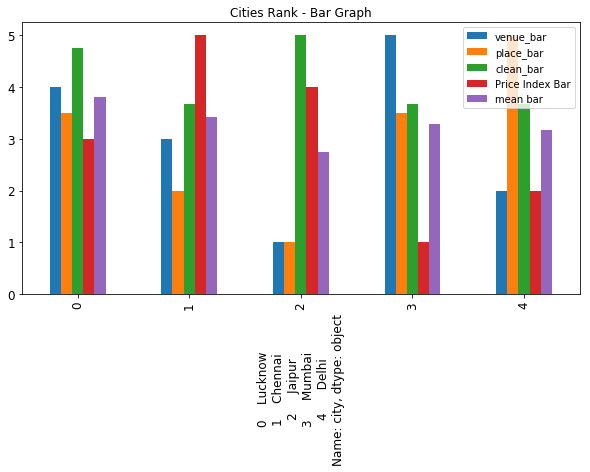

In [156]:
import matplotlib.pyplot as plt
ax = top_5_col_graph.plot(kind='bar', title ="Cities Rank - Bar Graph",figsize=(10,5),legend=True, fontsize=12)
ax.set_xlabel(top_5_col_graph['city'],fontsize=12, rotation=90)
plt.show()

Let's now group cities into two clusters by most common venues. We can then find similar cities

In [149]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[1:num_top_venues+1] #Remove No Category

Let's create a new dataframe and displacy most common 10 venues for each city

In [150]:
city_grouped

,city,Accessories Store,Advertising Agency,Afghan Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Tourist Information Center,Train Station,Travel Agency,University,Vegetarian / Vegan Restaurant,Video Store,Volleyball Court,Watch Shop,Women's Store,Zoo
0,"(Chennai,)",0.000000,0.000000,0.000000,0.000000,0.000316,0.000000,0.000000,0.000000,0.000316,...,0.000316,0.001262,0.000316,0.000316,0.000000,0.000000,0.000316,0.000000,0.000316,0.000000
1,"(Delhi,)",0.000000,0.000000,0.000000,0.000000,0.000621,0.000000,0.000000,0.000000,0.000621,...,0.000000,0.000000,0.000000,0.000000,0.000621,0.000000,0.000000,0.000000,0.001862,0.000000
2,"(Jaipur,)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002667,0.005333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004000,0.001333
3,"(Lucknow,)",0.000272,0.000000,0.000272,0.000272,0.000000,0.000272,0.000000,0.000000,0.000000,...,0.000000,0.000544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000272,0.000000
4,"(Mumbai,)",0.000216,0.000432,0.000000,0.000000,0.000216,0.000000,0.000216,0.000000,0.000216,...,0.000000,0.000432,0.000000,0.000000,0.000216,0.000216,0.000000,0.000216,0.000000,0.000000


In [151]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['city'] = city_grouped['city']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"(Chennai,)",Indian Restaurant,Office,Outlet Store,Miscellaneous Shop,Bus Station,Building,Train Station,Bank,Men's Store,Furniture / Home Store
1,"(Delhi,)",Indian Restaurant,Snack Place,Bank,Hardware Store,Dessert Shop,Fast Food Restaurant,Office,Women's Store,Hotel,Government Building
2,"(Jaipur,)",Bank,Indian Restaurant,Jewelry Store,Clothing Store,Historic Site,Arts & Crafts Store,Ice Cream Shop,Office,Miscellaneous Shop,Hospital
3,"(Lucknow,)",Indian Restaurant,Hotel,Platform,Clothing Store,Bank,Government Building,Motel,Bakery,Food Truck,Breakfast Spot
4,"(Mumbai,)",Office,Fast Food Restaurant,Indian Restaurant,Camera Store,Government Building,Bar,Café,Restaurant,Bookstore,Building


Let's now divide cities into two groups by using kmeans

In [167]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 2

city_grouped_clustering = city_grouped.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

array([0, 0, 1, 0, 0], dtype=int32)

Clearly Jaipur stands out as a different city, while all other cities seem to be similar if we create 2 clusters

In [169]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

city_grouped_clustering = city_grouped.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([0, 2, 1, 0, 0], dtype=int32)

If we create 3 clusters, then Delhi & Jaipur stand out

In [171]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

city_grouped_clustering = city_grouped.drop('city', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([0, 2, 1, 3, 3], dtype=int32)

If we create four clusters, Chennai also stand out . So Mumbai and Lucknow are most similar when we compare by most common venues